# Importing the requred packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the data set
df=pd.read_csv('processed.csv')

In [3]:
# to see all the columns 
pd.set_option('display.max_columns',100)

In [4]:
# Converting all column names to lower case
df.columns=df.columns.str.lower() # .upper()

In [5]:
df.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount,class,hour,amount_scaled,amount_log
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,0.383814,5.008166
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,-0.447989,0.993252
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,1.680460,5.936665
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,0.235943,4.816322
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,-0.066989,4.248495


In [6]:
df.shape

(281339, 34)

### Starting Machine learning

In [7]:
# spliting the data to y(dependent) variable and X (indipendent) variable
# the indipendent variable should be in upper case X and the y should be of lower case (according to statistics)
y=df['class'].values

In [8]:
# droping the columns which is not so importent, 
X=df.drop(columns=['time', 'amount_scaled','hour','class','amount_log'])

In [9]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [10]:
X

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281334,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
281335,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
281336,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
281337,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


### Setting the BASELINE of our model (raw data)

##### Importing the logistic regression model and train test split

In [11]:
# importing the model classifiers
from sklearn.linear_model import LogisticRegression
# importing the train test split
from sklearn.model_selection import train_test_split

In [12]:
# spliting the data in to train and test (with test size 30%)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [13]:
# making a model object
logreg=LogisticRegression()

In [14]:
# Training the model 
logreg.fit(X_train,y_train)

LogisticRegression()

In [15]:
# testing the model with the X_test data and storing the prediction and we will compare it with the y_test
# doing the prediction
y_pred=logreg.predict(X_test)

#### importing the packages for accuracy score

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
# checking the accuricy  score
print(accuracy_score(y_pred,y_test))

0.9991232435250349


In [18]:
# this looks like a good answer but it is not.
# the accuracy is very high because the system calculates the accuricy in this way 
# (TP+TN)/(TP+TN+FP+FN)
# THIS IS RIGHT FOR A BALANCED DATA SET

In [19]:
# AS OUR DATA IS highly positively skewed
# AND OUR TARGET IS TO FIND OUT THE FRAUD TRANSACTION
# WE WILL (FN+FP)/ACTUAL NUMBER OF FRAUD (AFTER CONFUSION MATRIX)

#### Now we will compare the prediction and actual data.

In [21]:
# checking the prediction
pd.Series(y_pred).value_counts()

0    84301
1      101
dtype: int64

In [22]:
# so we can see in prediction 84301 transaction are genuine and 101 is fraud 

In [23]:
# checking the actual data
pd.Series(y_test).value_counts()

0    84255
1      147
dtype: int64

In [24]:
# here we can see genuine transactions are 84255 and frauds are 147

In [25]:
# now we will find out the actual accuricy of the model
101/147

0.6870748299319728

In [26]:
# so it is 68.7% which is very poor

#### importing the packages for the confusion matrix

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
# checking the confusion matrix of actual data and predicted data
cnf_matrix=confusion_matrix(y_test,y_pred)

In [29]:
# let's check the matrix
cnf_matrix

array([[84241,    14],
       [   60,    87]], dtype=int64)

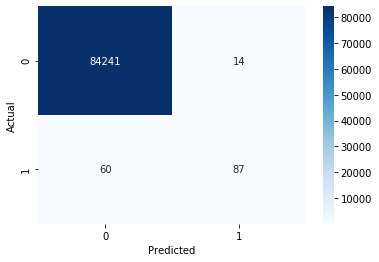

In [30]:
# for better understanding we will use a heat map
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap='Blues',fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [31]:
# ((1,0)+(0,1))/actual fraud transaction
(60+14)/147

0.5034013605442177

In [32]:
# now we can see the actual accuricy is 50.3%  
# meaning the prediction accuricy is almost the same as the probability of outcome of a coin toss.
# very poor

#### Importing the packages for ROC_AOC_CURVE

In [33]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [34]:
# checking the roc_auc_score
roc_auc_score(y_test,y_pred)

0.7958352862241567

In [36]:
# finding the probabilities of X_test
y_pred_proba = logreg.predict_proba(X_test)

In [37]:
# checking the probability
y_pred_proba

array([[9.99499619e-01, 5.00381208e-04],
       [9.99668443e-01, 3.31556896e-04],
       [9.99605947e-01, 3.94053050e-04],
       ...,
       [9.99853436e-01, 1.46563738e-04],
       [9.99971026e-01, 2.89743293e-05],
       [9.99992162e-01, 7.83823307e-06]])

#### Let's check the ROC_AUC_SCORE

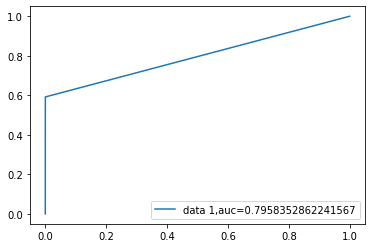

In [38]:
y_pred_proba=logreg.predict_proba(X_test)[::,1]
fpr,tpr,_=roc_curve(y_test,y_pred)
auc=roc_auc_score(y_test,y_pred)
plt.plot(fpr,tpr,label='data 1,auc='+str(auc))
plt.legend(loc=4)
plt.show()

### Let's Fix the class Imbalance and apply sampling techniques

#### to handel the class imbalance we need the library 'imblearn'

### importing the packages requred

In [39]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler

In [40]:
from collections import Counter # counter takes values returns value_counts dictionary
from sklearn.datasets import make_classification

### Let's apply undersampling

In [72]:
print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({0: 280867, 1: 472})


In [73]:
# we can see the data has 0 class of 280867 and 1 class has 472 rows

In [74]:
# creating a undersampler model objective
rus = RandomUnderSampler(random_state=42)# creating a undersampler model objective

In [75]:
# now we are undersampling our data
X_res, y_res = rus.fit_resample(X, y)

In [76]:
# let's check our data after undersampling
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 472, 1: 472})


In [77]:
# we can see both of the class of our data is now have 472 rows
# so now our data is balanced

In [78]:
# now we will run the under sampled data through logistic regression model and try to find all the relevent scores

#### RUNNING THE LOGISTIC REGRESSION WITH THE UNDERSAMPLED DATA

In [79]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=0)

In [80]:
# Creating the regression model objective
logreg = LogisticRegression()

In [81]:
# fitting our under sampled data to the regression model
logreg.fit(X_train, y_train)

LogisticRegression()

In [82]:
# let's predict on the basis of our X_test
y_pred = logreg.predict(X_test)

In [83]:
# let's look at the Accuracy
print(accuracy_score(y_pred , y_test))

0.9436619718309859


In [84]:
# in our previous model the accuracy was 0.999123, where as the actual accuracy was 50.03%
# now the data is balanced so it is giving us the accuracy of 0.9436619718309859.
# actually it is a huge improvement. 
# we will still try some other sampling techniques and models to further improve our model's accuracy. 

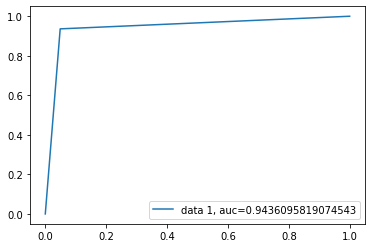

In [85]:
# let's look at the ROC CURVE
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### confusion matrix

In [86]:
# checking the confusion matrix of actual data and predicted data

cnf_matrix=confusion_matrix(y_test,y_pred)

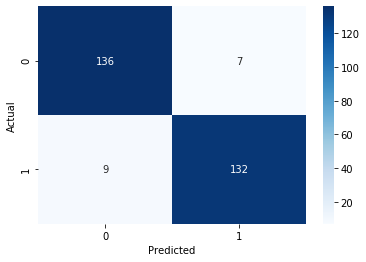

In [87]:
# for better understanding we will use a heat map
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap='Blues',fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Now we will try Oversampling

#### import packages

In [88]:
from imblearn.over_sampling import RandomOverSampler

In [89]:
# let's look at the original dependent data
print('Original dataset shape %s' % Counter(y))
random_state = 42

Original dataset shape Counter({0: 280867, 1: 472})


In [90]:
# our original data has 0 classs 280867 and 1 class 472

#### let's make a oversampling model objective

In [91]:
rus = RandomOverSampler(random_state=random_state)

In [92]:
# lets fit the oversampling model
X_res, y_res = rus.fit_resample(X, y)

In [93]:
# let's look at the oversempled dependent data
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 280867, 1: 280867})


### Now we will run this over sampled data to the same Logistic Regression model

In [94]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=0)

In [95]:
# creating a Logistic Regression model objective
logreg = LogisticRegression()

In [96]:
# fitting our over sampled data to the logistic regression model
logreg.fit(X_train, y_train)

LogisticRegression()

In [97]:
# let's predict according to our X_test data
y_pred = logreg.predict(X_test)

In [98]:
# let's look at the accuracy
print(accuracy_score(y_pred,y_test))

0.9476919790411877


In [99]:
# in undersampling accuracy was 0.94366 now in over sampling it is 0.94769 it has incresed a bit.

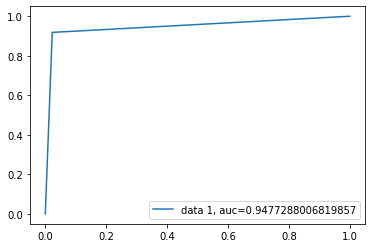

In [100]:
# let's look at the ROC CARVE
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### confusion matrix

In [101]:
# checking the confusion matrix of actual data and predicted data

cnf_matrix=confusion_matrix(y_test,y_pred)

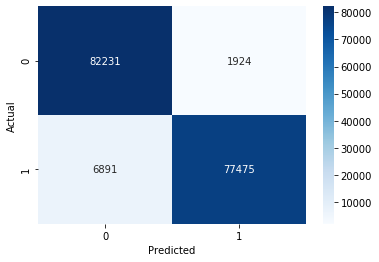

In [102]:
# for better understanding we will use a heat map
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap='Blues',fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [1]:
# allthough the accuracy is high but the type II type I error is not acceptable. 

## Now we will do SMOTE Sampling

In [104]:
# calling the packages
from imblearn.over_sampling import SMOTE, ADASYN

In [105]:
# let's check the shape of original data
print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({0: 280867, 1: 472})


#### creating a model objective for SMOTE sampling

In [106]:
rus = SMOTE(random_state=42)

In [107]:
# fitting the model to generate the SMOTE data set
X_res, y_res = rus.fit_resample(X, y)

In [108]:
# lets look at the SMOTE sampling data set
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 280867, 1: 280867})


### Now we will run this SMOTE SAMPLING Data to our Logistic Regression model

In [109]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=0)

In [110]:
# creating a Logistic Regression model objective
logreg = LogisticRegression()

In [111]:
# fitting the model
logreg.fit(X_train, y_train)

LogisticRegression()

In [112]:
# Let's do the predicting on the besis of X_test
y_pred = logreg.predict(X_test)

In [113]:
# let's check the accuracy
print(accuracy_score(y_pred , y_test))

0.9586342354958729


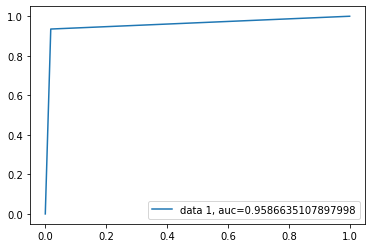

In [114]:
# let's draw the roc carve
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### confusion matrix

In [115]:
# checking the confusion matrix of actual data and predicted data

cnf_matrix=confusion_matrix(y_test,y_pred)

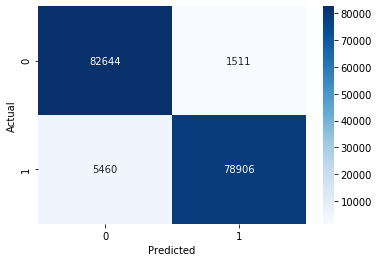

In [116]:
# for better understanding we will use a heat map
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap='Blues',fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [117]:
# it has a higher accuricy but the type II type I errors are not acceptable.

#### SMOTE samling fails if the data class is balanced or positions close to each other means semilar values

#### PCA analysis (PRINCIPAL COMPONENT ANALYSIS)

In [119]:
# calling the packages requred
from sklearn.decomposition import PCA # to do this we can also SVD , t-SNE , Linear Discrimant Analysis

In [120]:
# we are reducing it to 2 because we want a 2 dimentional plot 
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X_res)

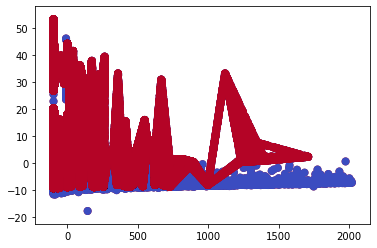

In [121]:
# scatter ploting the redused data
plt.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y_res== 0), cmap='coolwarm', label='No Fraud', linewidths=2)
plt.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y_res == 1), cmap='coolwarm', label='Fraud', linewidths=2)
plt.show()

## Let's try ADASYN

In [122]:
# original shape of the data
print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({0: 280867, 1: 472})


In [123]:
# creating a model objective for ADASYN sampling
rus = ADASYN(random_state=42)

In [124]:
# fitting the model to do the sampling
X_res, y_res = rus.fit_resample(X, y)

In [125]:
# let's look at the data after ADASYN sampling
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 280867, 1: 280864})


### Let's run the ADASYN sampling data through our Logistic Regression model

In [126]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=0)

In [127]:
# creating a Logistiv Regression model objective
logreg = LogisticRegression()

In [128]:
# fitting our model with training data
logreg.fit(X_train, y_train)

LogisticRegression()

In [129]:
# let's predict on the besis of our X_test data
y_pred = logreg.predict(X_test)

In [130]:
# let's look at the accuracy score
print(accuracy_score(y_pred , y_test))

0.9184191787324947


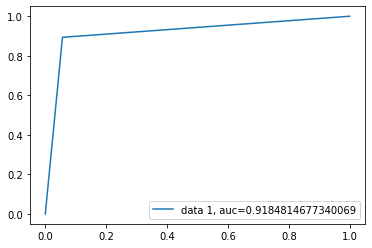

In [131]:
# Let's look at the roc curve
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### confusion matrix

In [133]:
# checking the confusion matrix of actual data and predicted data

cnf_matrix=confusion_matrix(y_test,y_pred)

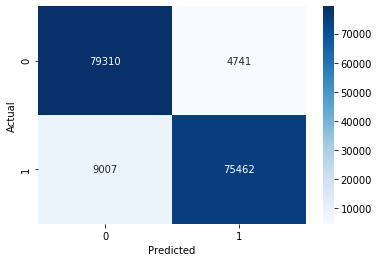

In [134]:
# for better understanding we will use a heat map
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap='Blues',fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [135]:
# ADASYN sampling has apoor result

### NOW WE WILL CREAT DIFFERENT DATA SET ACCORDING TO THE SAMPLING TYPE,
### WE WILL PASS THE DIFFERENT DATA SET THROUGH DIFFERENT MODELS
### TO OBSERVE WHICH MODEL WHITH WHICH SAMPLING GIVES US THE BEST OUTCOME

#### Creating Undersampled Data

In [137]:
# THIS IS THE UNDER SAMPLING MODEL OBJECTIVE
rus = RandomUnderSampler(random_state=42) 

# FITTING THE UNDER SAMPLING MODEL & store the result as a data set X_under & y_under
X_under, y_under = rus.fit_resample(X, y) 

# checking the shape of the new data set
print('Resampled dataset shape %s' % Counter(y_under))

Resampled dataset shape Counter({0: 472, 1: 472})


#### Creating Oversampled Data

In [138]:
# THIS IS THE OVER SAMPLING MODEL OBJECTIVE
rus = RandomOverSampler(random_state=42) 

# FITTING THE OVER SAMPLING MODEL & store the result as a data set X_over & y_over.
X_over, y_over = rus.fit_resample(X, y)

# checking the shape of the new data set
print('Resampled dataset shape %s' % Counter(y_over))

Resampled dataset shape Counter({0: 280867, 1: 280867})


#### Creating SMOTE Data

In [139]:
# THIS IS THE SMOTE SAMPLING MODEL OBJECTIVE
rus = SMOTE(random_state=42)

# FITTING THE SMOTE SAMPLING MODEL & store the result as a data set X_smote & y_smote.
X_smote, y_smote = rus.fit_resample(X, y)

# checking the shape of the new data set
print('Resampled dataset shape %s' % Counter(y_smote))

Resampled dataset shape Counter({0: 280867, 1: 280867})


## Now we willapply different models and evaluate the dataset

### IMPORTING DIFFERENT MACHINE LEARNING MODELS

In [140]:
# IMPORTING DIFFERENT MACHINE LEARNING MODELS, THROUGH WHICH WE WILL PASS OUR DIFFERENT DATA TO FIND THE BEST ANSWER.
from sklearn.svm import SVC # Support Vector Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [142]:
# now we will pick one machine learning model and  
# we will pass through 4 sets of data (base data,undersampling,oversampling,SMOTE)
# FROM EACH DATA SET'S RESULT WE WILL OBSERVE 3 THING (ACCURACY_SCORE, ROC_AUC_SCORE, CONFUSION_METRICS)

### Decision Tree Classifier

#### Decision Tree Classifier With ROW (BASELINE) Data

In [143]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [144]:
# Decision Tree Classifier model objective
dte = DecisionTreeClassifier()

In [145]:
# fitting the decision tree with training data
dte.fit( X_train, y_train )

DecisionTreeClassifier()

In [146]:
# predict on the besis of X_test
y_pred = dte.predict(X_test)

In [147]:
# accuracy_score
print(accuracy_score(y_pred , y_test))# accuracy_score

0.9990876993436174
0.9990876993436174


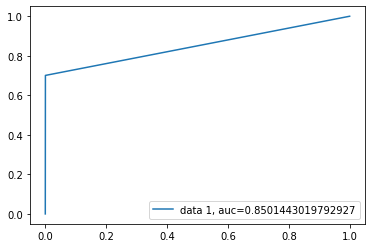

In [148]:
# ROC_AUC_SCORE
y_pred_proba = dte.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

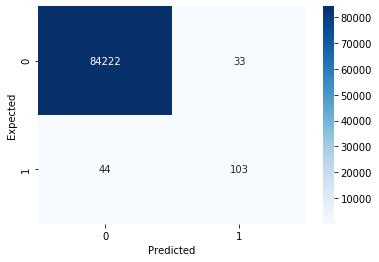

In [149]:
# Confusion metrics
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

### Decision Tree Classifier with UNDERSAMPL data

0.8908450704225352


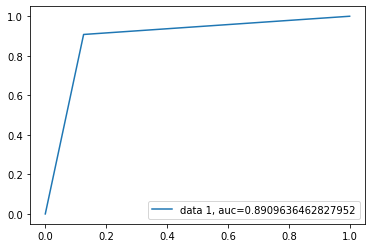

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.3, random_state=0) # TRAIN TEST SPLIT
dte = DecisionTreeClassifier() # DECISION TREE CLASSIFIER OBJECTIVE
dte.fit(X_train, y_train) # FITTING THE MODEL WITH TRAINING DATA

y_pred = dte.predict(X_test) # PREDICTING
print(accuracy_score(y_pred , y_test)) # ACCURACY SCORE COMPARING PREDICTION AND ACTUAL DATA(Y_TEST)

# ROC_AUC_SCORE
y_pred_proba = dte.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

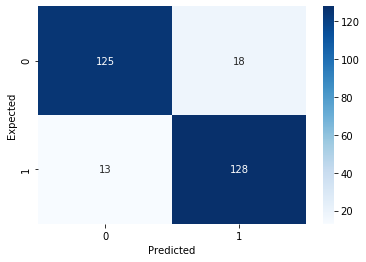

In [151]:
# CONFUSION METRIX
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

### Decision Tree Classifier with OVERSAMPL data

0.9996795651580516


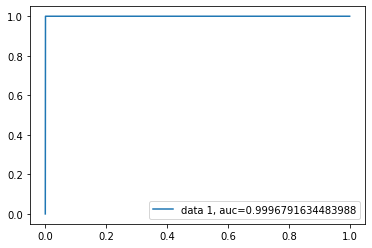

In [152]:
# LOOKING AT THE RESULT, OVERSAMPLING GIVES US BEST RESULT IN DECISION TREE
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=0) # TRAIN TEST SPLIT
dte = DecisionTreeClassifier() # DECISION TREE MODEL OBJECTIVE
dte.fit(X_train, y_train) # FITTING THE TREE WITH TRAINING  DATA

y_pred = dte.predict(X_test) # PREDICTING
print(accuracy_score(y_pred , y_test)) # ACCURACY SCORE COMPARING PREDICTION AND ACTUAL DATA (Y_TEST)

# ROC_AUC_SCORE
y_pred_proba = dte.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

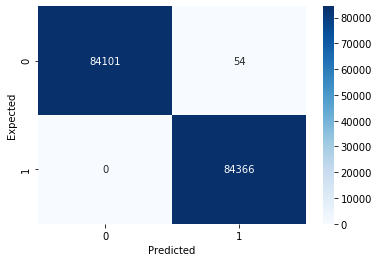

In [153]:
# CONFUSION MATRIX
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

### Decision Tree Classifier with SMOTE SAMPL data

0.998243542347838


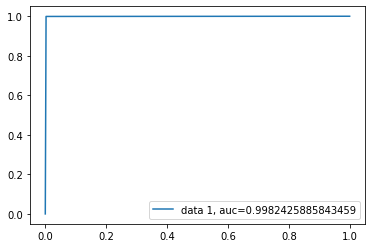

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=0) #TRAIN TEST SPLIT
dte = DecisionTreeClassifier() # DECISION TREE MODEL OBJECTIVE
dte.fit(X_train, y_train) # FITTING THE DECISION TREE WITH TRAINING DATA

y_pred = dte.predict(X_test) # PREDICTING
print(accuracy_score(y_pred , y_test)) # ACCURACY SCORE COMPARING PREDICTION AND ACTUAL DATA (Y_TEST)

# ROC_AUC_SCORE
y_pred_proba = dte.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

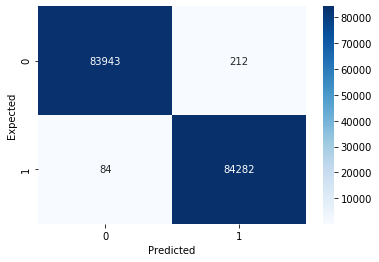

In [155]:
# CONFUSION MATRIX
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

## Random Forest

### Random Forest Classifier with ROW (BASELINE) data

0.9995853178834625


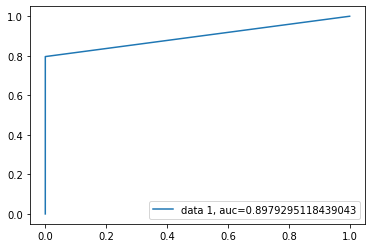

In [156]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Random forest Classifier model objective
rfc=RandomForestClassifier()

# fitting the random forest with training data
rfc.fit( X_train, y_train )

# predict on the besis of X_test
y_pred = rfc.predict(X_test)

# accuracy_score
print(accuracy_score(y_pred , y_test))

# ROC_AUC_SCORE
y_pred_proba = rfc.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

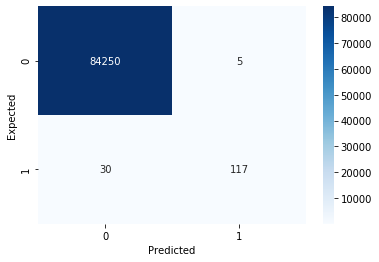

In [157]:
# Confusion metrics
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

### Random Forest Classifier with undersampling data

0.9471830985915493


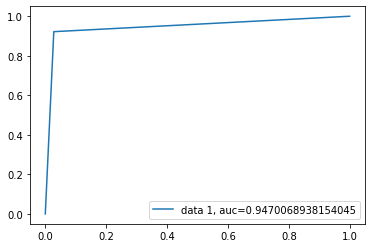

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.3, random_state=0) # TRAIN TEST SPLIT
rfc=RandomForestClassifier() # RANDOM FOREST CLASSIFIER OBJECTIVE
rfc.fit(X_train, y_train) # FITTING THE MODEL WITH TRAINING DATA

y_pred = rfc.predict(X_test) # PREDICTING
print(accuracy_score(y_pred , y_test)) # ACCURACY SCORE COMPARING PREDICTION AND ACTUAL DATA(Y_TEST)

# ROC_AUC_SCORE
y_pred_proba = rfc.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

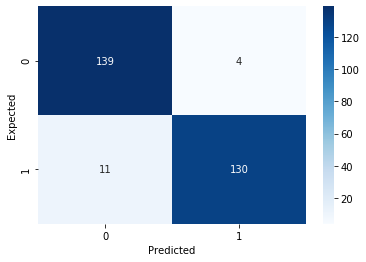

In [159]:
# Confusion metrics
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

## Random Forest with oversampling data

0.9999465941930086


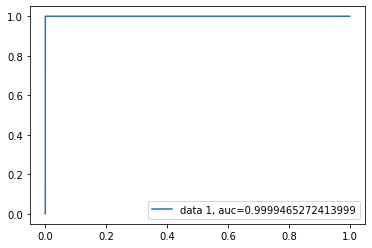

In [160]:
 # TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=0)
rfc=RandomForestClassifier() # RANDOM FOREST CLASSIFIER OBJECTIVE
rfc.fit(X_train, y_train) # FITTING THE MODEL WITH TRAINING DATA

y_pred = rfc.predict(X_test) # PREDICTING
print(accuracy_score(y_pred , y_test)) # ACCURACY SCORE COMPARING PREDICTION AND ACTUAL DATA (Y_TEST)

# ROC_AUC_SCORE
y_pred_proba = rfc.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

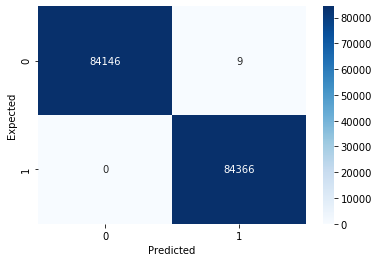

In [161]:
# Confusion metrics
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [2]:
# ACCORDING TO ACCURACY AND THE TYPE II AND TYPE I ERROR THIS MODEL WOULD BE OUR ANSWER. 

### Random Forest with SMOTE DATA SET

0.9998872544074626


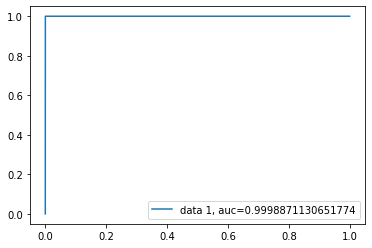

In [163]:
 #TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=0)
rfc=RandomForestClassifier() # RANDOM FOREST CLASSIFIER OBJECTIVE
rfc.fit(X_train, y_train) # FITTING THE MODEL WITH TRAINING DATA

y_pred = rfc.predict(X_test) # PREDICTING
print(accuracy_score(y_pred , y_test)) # ACCURACY SCORE COMPARING PREDICTION AND ACTUAL DATA (Y_TEST)

# ROC_AUC_SCORE
y_pred_proba = rfc.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

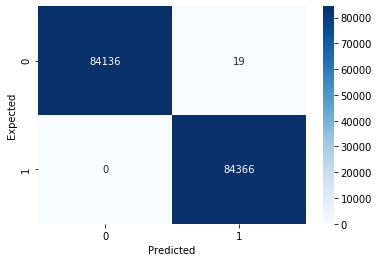

In [164]:
# Confusion metrics
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

## SUPPORT VECTOR CLASSIFIER 

#### SUPPORT VECTOR MACHINE WITH RAW (BASELINE) DATA

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# SUPPORT VECTOR Classifier model objective
svc=SVC()

# fitting the support vector with training data
svc.fit( X_train, y_train )

# predict on the besis of X_test
y_pred = svc.predict(X_test)

# accuracy_score
print(accuracy_score(y_pred , y_test))

# ROC_AUC_SCORE
# y_pred_proba = svc.predict_proba(X_test)[::,1] # predict_proba dosen't work in support vector
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
# Confusion metrics
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

#### SUPPORT VECTOR MACHINE WITH under sampling DATA

In [ ]:
# TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.3, random_state=0)
# SUPPORT VECTOR Classifier model objective
svc=SVC()

# fitting the support vector with training data
svc.fit( X_train, y_train )

y_pred = svc.predict(X_test) # PREDICTING
print(accuracy_score(y_pred , y_test)) # ACCURACY SCORE COMPARING PREDICTION AND ACTUAL DATA(Y_TEST)

# ROC_AUC_SCORE
# y_pred_proba = svc.predict_proba(X_test)[::,1] # predict_proba dosen't work in support vector
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
# Confusion metrics
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

#### SUPPORT VECTOR MACHINE WITH over sampling DATA

In [ ]:
 # TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=0)
# SUPPORT VECTOR Classifier model objective
svc=SVC()

# fitting the support vector with training data
svc.fit( X_train, y_train )

y_pred = svc.predict(X_test) # PREDICTING
print(accuracy_score(y_pred , y_test)) # ACCURACY SCORE COMPARING PREDICTION AND ACTUAL DATA (Y_TEST)

# ROC_AUC_SCORE
# y_pred_proba = svc.predict_proba(X_test)[::,1]  # predict_proba dosen't work in support vector
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
# Confusion metrics
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

#### SUPPORT VECTOR MACHINE WITH SMOTE DATA

In [ ]:
#TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=0)
# SUPPORT VECTOR Classifier model objective
svc=SVC()

# fitting the support vector with training data
svc.fit( X_train, y_train )

y_pred = svc.predict(X_test) # PREDICTING
print(accuracy_score(y_pred , y_test)) # ACCURACY SCORE COMPARING PREDICTION AND ACTUAL DATA (Y_TEST)

# ROC_AUC_SCORE
# y_pred_proba = svc.predict_proba(X_test)[::,1]  # predict_proba dosen't work in support vector
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
# Confusion metrics
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

## K Nearest Neighbors Classifier

In [165]:
### Power of GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

# K Neighbors Classifier 
knc_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_knc = GridSearchCV(KNeighborsClassifier(), knc_params)
grid_knc.fit(X_train, y_train)

# We automatically get the K Neighbors Classifier with the best parameters.
knc = grid_knc.best_estimator_

#### KNeighbors Classifier with (BASELINE) RAW DATA

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# K NEIGHBORS Classifier model objective
knc=KNeighborsClassifier()

# fitting theK NEIGHBORS Classifier with training data
knc.fit( X_train, y_train )

# predict on the besis of X_test
y_pred = knc.predict(X_test)

# accuracy_score
print(accuracy_score(y_pred , y_test))

# ROC_AUC_SCORE
y_pred_proba = knc.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
# Confusion metrics
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

### K Neighbors with undersampling data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.3, random_state=0) # TRAIN TEST SPLIT
# K NEIGHBORS Classifier model objective
knc=KNeighborsClassifier()

# fitting theK NEIGHBORS Classifier with training data
knc.fit( X_train, y_train )

y_pred = knc.predict(X_test) # PREDICTING
print(accuracy_score(y_pred , y_test)) # ACCURACY SCORE COMPARING PREDICTION AND ACTUAL DATA(Y_TEST)

# ROC_AUC_SCORE
y_pred_proba = knc.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
# Confusion metrics
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

### K Neighbors with over sampling data

In [ ]:
# TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=0)
# K NEIGHBORS Classifier model objective
knc=KNeighborsClassifier()

# fitting theK NEIGHBORS Classifier with training data
knc.fit( X_train, y_train )

y_pred = knc.predict(X_test) # PREDICTING
print(accuracy_score(y_pred , y_test)) # ACCURACY SCORE COMPARING PREDICTION AND ACTUAL DATA (Y_TEST)

# ROC_AUC_SCORE
y_pred_proba = knc.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
# Confusion metrics
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

### K Neighbors with SMOTE data

In [ ]:
 #TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=0)
# K NEIGHBORS Classifier model objective
knc=KNeighborsClassifier()

# fitting theK NEIGHBORS Classifier with training data
knc.fit( X_train, y_train )

y_pred = knc.predict(X_test) # PREDICTING
print(accuracy_score(y_pred , y_test)) # ACCURACY SCORE COMPARING PREDICTION AND ACTUAL DATA (Y_TEST)

# ROC_AUC_SCORE
y_pred_proba = knc.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
# Confusion metrics
cnf_matrix = confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()